# 변동성 돌파 전략

일봉 데이터를 이용한 변동성 돌파 전략은 거래일의 현재가가 (시가 + 전일 변동폭 * 0.5)를 돌파할 때 매수하고 종가에 매도하는 전략입니다. 


여기서 전일 변동폭은 (전일 고가 – 전일 저가)로 정의합니다. 

예를 들어, 삼성전자의 2021년 9월 9일 고가가 73,000원이고 저가가 72,000원이면 해당일의 변동폭은 1,000원입니다. 

삼성전자가 2021년 9월 10일 시가가 73,500원이면 해당 거래일의 매수 목표가는 74,000(73500+1000*0.5) 원이 됩니다. 

장중에 현재가가 당일 매수 목표가인 74,000원을 돌파하는 순간 매수한 후 당일 종가 또는 다음날 시가로 매도하는 전략입니다.


투자대상: KODEX 코스닥 150

매수전략:현재가격이 목표가 돌파시 장중에 매수

매도전략:매수시 당일 종가에 매도

In [4]:
#KODEX 코스닥 150 일봉 데이터
import pandas as pd

df = pd.read_excel("D:\download\pandas/229200.xlsx", index_col="날짜")
# 엑셀의 날짜 컬럼을 데이터프레임의 인덱스로 설정 
df

,시가,고가,저가,종가,거래량
날짜,,,,,
2015-10-01,10279,10279,10211,10216,30032
2015-10-02,10250,10275,10250,10263,60029
2015-10-05,10374,10384,10326,10347,40976
2015-10-06,10365,10392,10287,10291,40252
2015-10-07,10211,10211,10061,10062,20248
...,...,...,...,...,...
2021-09-02,15095,15160,15045,15105,1874702
2021-09-03,15115,15215,15085,15175,1388557
2021-09-06,15170,15270,15110,15185,2252617


# 변동성 돌파 전략 백테스팅


In [6]:
# 각 거래일의 변동 계산

# 변동은 각 거래일의 고가 - 저가로 정의한다.

df['변동'] = df['고가'] - df['저가']
df.head()

,시가,고가,저가,종가,거래량,변동
날짜,,,,,,
2015-10-01,10279,10279,10211,10216,30032,68
2015-10-02,10250,10275,10250,10263,60029,25
2015-10-05,10374,10384,10326,10347,40976,58
2015-10-06,10365,10392,10287,10291,40252,105
2015-10-07,10211,10211,10061,10062,20248,150


In [9]:
#쉬프트 함수를 이용해 전일변동 이라는 컬럼을 추가 

df['전일변동'] = df['변동'].shift(1) #한 칸씩 아래로 밀리게 
df.head()

,시가,고가,저가,종가,거래량,변동,전일변동
날짜,,,,,,,
2015-10-01,10279,10279,10211,10216,30032,68,NaN
2015-10-02,10250,10275,10250,10263,60029,25,68.0
2015-10-05,10374,10384,10326,10347,40976,58,25.0
2015-10-06,10365,10392,10287,10291,40252,105,58.0
2015-10-07,10211,10211,10061,10062,20248,150,105.0


In [10]:
# 목표가 컬럼 추가

# 전에 만든 전일변동 컬럼을 이용해서 시가 + 전일 변동폭 * 0.5

df['목표가'] = df['시가'] + df['전일변동'] * 0.5
df.head()

,시가,고가,저가,종가,거래량,변동,전일변동,목표가
날짜,,,,,,,,
2015-10-01,10279,10279,10211,10216,30032,68,NaN,NaN
2015-10-02,10250,10275,10250,10263,60029,25,68.0,10284.0
2015-10-05,10374,10384,10326,10347,40976,58,25.0,10386.5
2015-10-06,10365,10392,10287,10291,40252,105,58.0,10394.0
2015-10-07,10211,10211,10061,10062,20248,150,105.0,10263.5


In [14]:
#수익률 컬럼 추가 

# 거래일의 고가가 목표보다 크거나 같다면 해당 거래일에는 목표가에서 매수할 수 있습니다.
#  매수했다면 당일 종가에 매도하는 것을 가정합니다.
# 거래일에 매수가 이뤄졌다면 수익률은 종가를 목표가로 나눠 계산합니다.
#  거래일에 매수가 일어나지 않았다면 원금이 그대로 유지되므로 수익률은 1입니다

import numpy as np

df['수익률'] = np.where(df['고가'] >= df['목표가'], df['종가']/df['목표가'], 1 )

# 고가가 목표가랑 같거나 크면 매수 , 매수가 이뤄졌다면 종가/목표가로 수익률 계산 , 안 샀다면 원금은 그대로 유지되므로 수익률 1로 출력

df.head()

,시가,고가,저가,종가,거래량,변동,전일변동,목표가,수익률
날짜,,,,,,,,,
2015-10-01,10279,10279,10211,10216,30032,68,NaN,NaN,1.000000
2015-10-02,10250,10275,10250,10263,60029,25,68.0,10284.0,1.000000
2015-10-05,10374,10384,10326,10347,40976,58,25.0,10386.5,1.000000
2015-10-06,10365,10392,10287,10291,40252,105,58.0,10394.0,1.000000
2015-10-07,10211,10211,10061,10062,20248,150,105.0,10263.5,1.000000
...,...,...,...,...,...,...,...,...,...
2021-09-02,15095,15160,15045,15105,1874702,115,190.0,15190.0,1.000000
2021-09-03,15115,15215,15085,15175,1388557,130,115.0,15172.5,1.000165
2021-09-06,15170,15270,15110,15185,2252617,160,130.0,15235.0,0.996718


In [15]:
#누적수익률 구해서 컬럼에 추가하기

df['누적수익률'] = df['수익률'].cumprod() #cumprod 메서드 행/열의 누적곱을 구하는 메서드


# 수익률 컬럼 데이터 전체의 누적곱을 구함 df['수익률'].cumprod()

df.tail()

,시가,고가,저가,종가,거래량,변동,전일변동,목표가,수익률,누적수익률
날짜,,,,,,,,,,
2021-09-02,15095,15160,15045,15105,1874702,115,190.0,15190.0,1.000000,2.209883
2021-09-03,15115,15215,15085,15175,1388557,130,115.0,15172.5,1.000165,2.210247
2021-09-06,15170,15270,15110,15185,2252617,160,130.0,15235.0,0.996718,2.202993
2021-09-07,15165,15235,15120,15235,819776,115,160.0,15245.0,1.000000,2.202993
2021-09-08,15170,15180,14900,14925,1459414,280,115.0,15227.5,1.000000,2.202993


In [17]:
# 연평균수익률 계산

# CAGR = (마지막값/처음값) ** (1/투자기간) - 1

#df.index[-1] Timestamp('2021-09-08 00:00:00')
#df.index[0] Timestamp('2015-10-01 00:00:00')
#delta.days 2169일 kODEX 코스닥 150 지수는 2015년부터 생겼으므로 만들어진지 2169일 됨 
# 2169/365 = 약 5.9년 
#
delta = df.index[-1] - df.index[0] #최근날짜 - 오래된날짜
year = delta.days / 365
CAGR = df['누적수익률'].iloc[-1] ** (1 / year) - 1 #누적수익률 ** (1/year) - 1
print("CAGR :", CAGR * 100)

CAGR : 14.214796770147164


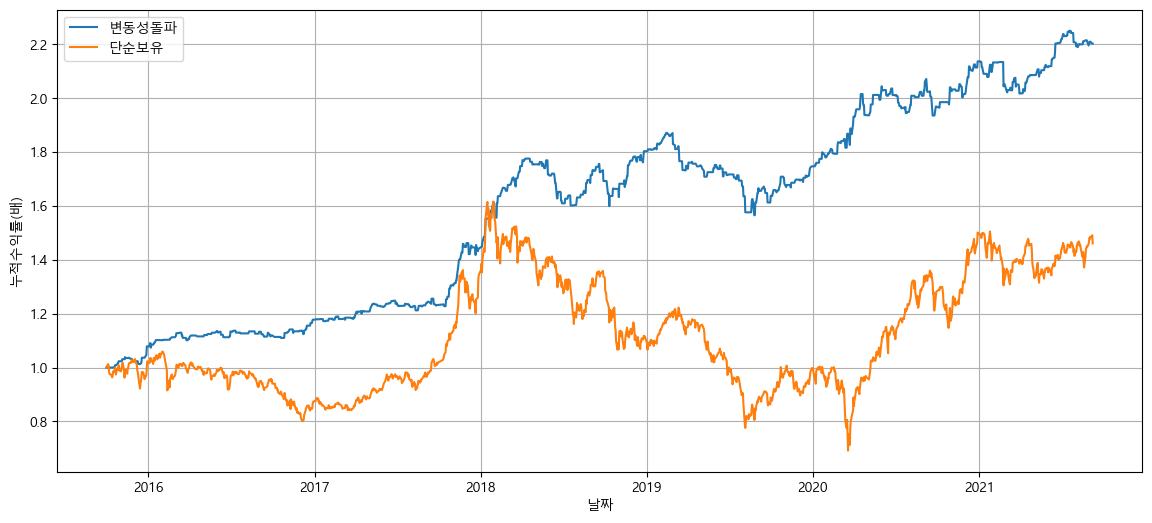

In [40]:
# 변동성 돌파 전략의 누적수익률과 단순 보유 경우의 누적수익률 그래프

import matplotlib.pyplot as plt
import platform

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
    
else:
    plt.rc('font', family='Malgun Gothic')
    
    fig = plt.figure(figsize =(14,6))
    ax = fig.add_subplot(1,1,1) # 1행 1열 1subplot
    ax.plot(df['누적수익률'], label ="변동성돌파")
    ax.plot(df['종가'] / df['종가'].iloc[0] , label ="단순보유") 
    
    
    
    #단순보유 누적수익률은 종가 / 시작일 종가 하면 나온다. 수익실현을 안하고 시작일부터 보유만 하고 있는 걸로 가정하므로 
    
    
    plt.xlabel("날짜") 
    plt.ylabel("누적수익률(배)")
    plt.grid(True) #grid 격자  axis='y'라 하면 y축 격자 (True)는 x y 격자 
    plt.legend() #legend 범례
    plt.show()

In [38]:
df['종가']

날짜
2015-10-01    10216
2015-10-02    10263
2015-10-05    10347
2015-10-06    10291
2015-10-07    10062
              ...  
2021-09-02    15105
2021-09-03    15175
2021-09-06    15185
2021-09-07    15235
2021-09-08    14925
Name: 종가, Length: 1462, dtype: int64

In [39]:
df['종가'].iloc[0]

10216

In [45]:
# MDD Mx Draw Down 최대낙폭 일정기간 동안 최고점과 최저점을 비율로 계산한 값
# 고점 대비 몇%가 빠졌는가 MDD -50% = 고점 대비 50% 가격하락
# MDD가 크면 변동성이 큼 MDD가 작으면 변동성이 작음 

# MDD = (최저점 - 전고점) / 전고점 * 100


#cummax 누적최대값 

df['전고점'] = df['누적수익률'].cummax() 
df['DD'] = (1 - df['누적수익률'] / df['전고점']) * 100
df.tail()

,시가,고가,저가,종가,거래량,변동,전일변동,목표가,수익률,누적수익률,전고점,DD
날짜,,,,,,,,,,,,
2021-09-02,15095,15160,15045,15105,1874702,115,190.0,15190.0,1.000000,2.209883,2.251132,1.832337
2021-09-03,15115,15215,15085,15175,1388557,130,115.0,15172.5,1.000165,2.210247,2.251132,1.816161
2021-09-06,15170,15270,15110,15185,2252617,160,130.0,15235.0,0.996718,2.202993,2.251132,2.138393
2021-09-07,15165,15235,15120,15235,819776,115,160.0,15245.0,1.000000,2.202993,2.251132,2.138393
2021-09-08,15170,15180,14900,14925,1459414,280,115.0,15227.5,1.000000,2.202993,2.251132,2.138393


In [46]:
df['DD'].max()

16.335015560662914

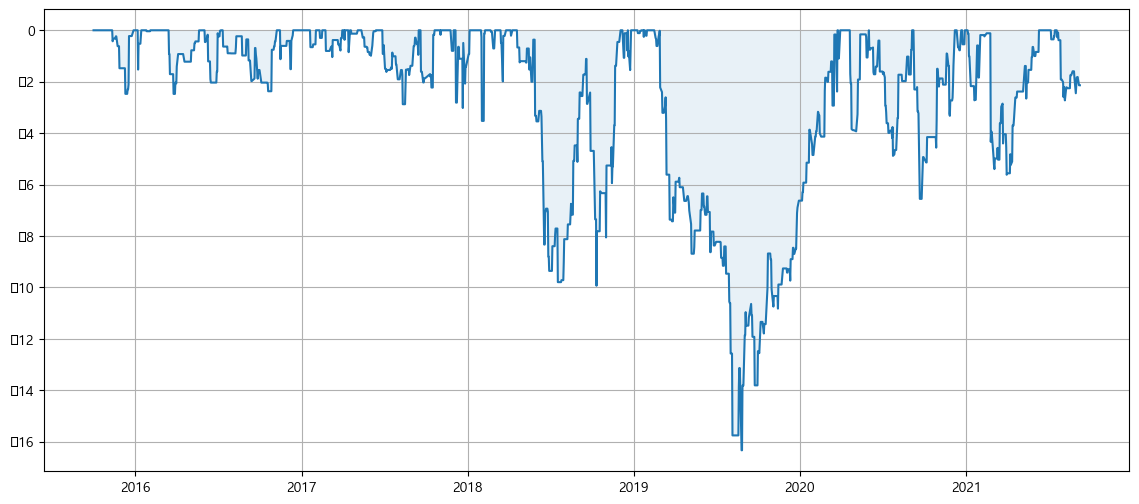

In [77]:
# MDD의 그래프 

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,1,1)

ax.plot(df.index, df['DD'] * -1)
ax.fill_between(df.index, df['DD'] * -1,  alpha=0.1) 
ax.grid()
plt.show()

#fill_between x축 부터 정한 범위까지 해당 영역이 채워짐 alpha = 투명도 

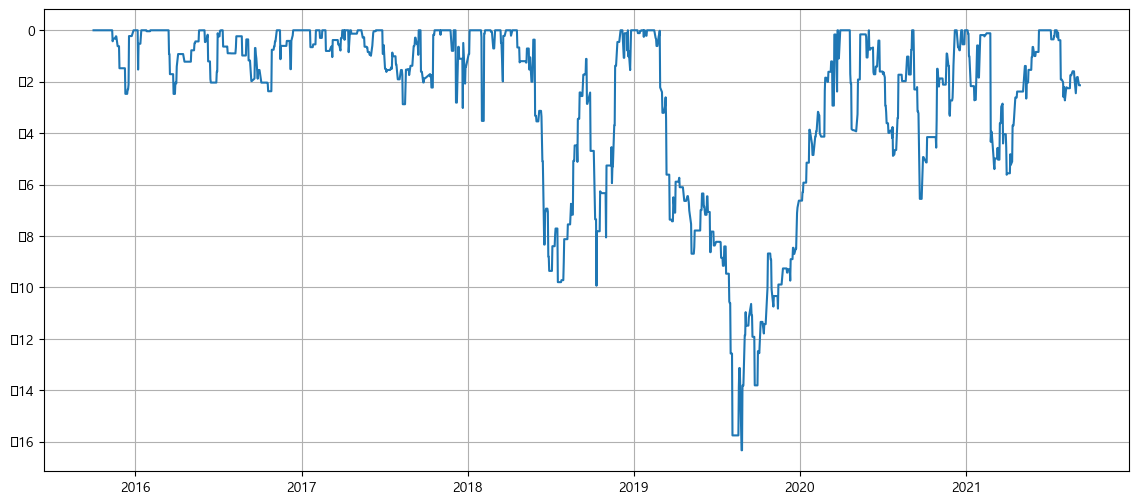

In [62]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,1,1)

ax.plot(df.index, df['DD'] * -1)
#ax.fill_between(df.index, df['DD'] * -1,  alpha=0.1) 
ax.grid()
plt.show()

# 마켓 메이킹

마켓 타이밍이란 시장을 상승 구간과 하락 구간으로 구분한 후 상승 구간에서만 투자하고 하락 구간에서는 투자를 쉬는 전략을 말한다.

마켓 타이밍 조건을 추가하면 시장이 급락하는 구간을 효과적으로 피할 수 있기 때문에 MDD를 줄일 수 있다.

In [63]:
# 코스닥 지수의 이동평균선 컬럼 추가하기


#이동평균선 구하는 함수 rolling window 몇개씩 구할지  .mean 평균 내라 

df['MA10'] = df['종가'].rolling(window=10).mean()
df.head(n=10)

,시가,고가,저가,종가,거래량,변동,전일변동,목표가,수익률,누적수익률,전고점,DD,MA10
날짜,,,,,,,,,,,,,
2015-10-01,10279,10279,10211,10216,30032,68,NaN,NaN,1.0,1.0,1.0,0.0,NaN
2015-10-02,10250,10275,10250,10263,60029,25,68.0,10284.0,1.0,1.0,1.0,0.0,NaN
2015-10-05,10374,10384,10326,10347,40976,58,25.0,10386.5,1.0,1.0,1.0,0.0,NaN
2015-10-06,10365,10392,10287,10291,40252,105,58.0,10394.0,1.0,1.0,1.0,0.0,NaN
2015-10-07,10211,10211,10061,10062,20248,150,105.0,10263.5,1.0,1.0,1.0,0.0,NaN
2015-10-08,10118,10137,9898,9968,40068,239,150.0,10193.0,1.0,1.0,1.0,0.0,NaN
2015-10-12,9966,9966,9936,9943,40071,30,239.0,10085.5,1.0,1.0,1.0,0.0,NaN
2015-10-13,9983,9983,9891,9892,20026,92,30.0,9998.0,1.0,1.0,1.0,0.0,NaN
2015-10-14,9886,9917,9842,9844,22141,75,92.0,9932.0,1.0,1.0,1.0,0.0,NaN


In [64]:
# 매매신호 컬럼 만들기
# 매매는 거래일의 시가가 전일 종가까지의 데이터로 계산된 10일 이동편균 보다 높은 경우 실행

df['매매신호'] = df['시가'] > df['MA10'].shift(1)
df

,시가,고가,저가,종가,거래량,변동,전일변동,목표가,수익률,누적수익률,전고점,DD,MA10,매매신호
날짜,,,,,,,,,,,,,,
2015-10-01,10279,10279,10211,10216,30032,68,NaN,NaN,1.000000,1.000000,1.000000,0.000000,NaN,False
2015-10-02,10250,10275,10250,10263,60029,25,68.0,10284.0,1.000000,1.000000,1.000000,0.000000,NaN,False
2015-10-05,10374,10384,10326,10347,40976,58,25.0,10386.5,1.000000,1.000000,1.000000,0.000000,NaN,False
2015-10-06,10365,10392,10287,10291,40252,105,58.0,10394.0,1.000000,1.000000,1.000000,0.000000,NaN,False
2015-10-07,10211,10211,10061,10062,20248,150,105.0,10263.5,1.000000,1.000000,1.000000,0.000000,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-02,15095,15160,15045,15105,1874702,115,190.0,15190.0,1.000000,2.209883,2.251132,1.832337,14770.0,True
2021-09-03,15115,15215,15085,15175,1388557,130,115.0,15172.5,1.000165,2.210247,2.251132,1.816161,14886.0,True
2021-09-06,15170,15270,15110,15185,2252617,160,130.0,15235.0,0.996718,2.202993,2.251132,2.138393,14963.0,True


In [66]:
# 마켓타이밍을 추가 적용한 전략의 수익률 

df['수익률2'] = np.where((df['매매신호'] == 1) & (df['고가'] >= df['목표가']),
                      df['종가'] / df['목표가'],
                     1)

#기존의 수익률 공식에 df['매매신호'] == 1 을 추가하고 and & 연산자 
# 매매신호가 True 이고 
# 고가가 목표가랑 크거나 같으면 매수하고 
# 매수가 이뤄졌다면 종가/목표가로 수익률 계산 , 안 샀다면 원금은 그대로 유지되므로 수익률 1로 출력

df['누적수익률2'] = df['수익률2'].cumprod()
print(df['누적수익률2'].iloc[-1])

1.6154077758801972


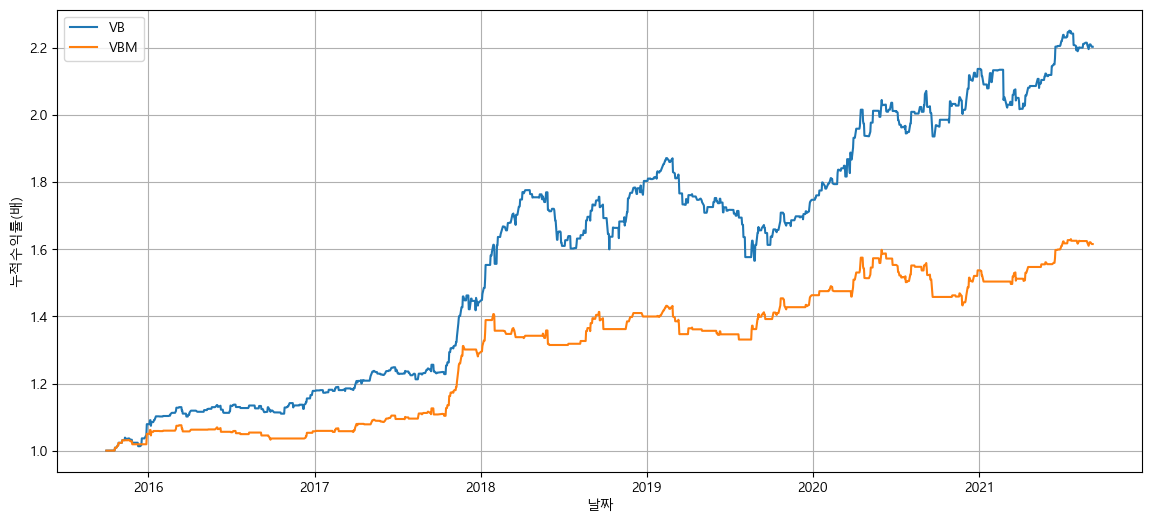

In [70]:
# 변동성 돌파 전략 vs 마켓 타이밍이 적용된 변동성 돌파 전략 그래프 


import matplotlib.pyplot as plt
import platform


if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')
    
    
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,1,1)
ax.plot(df['누적수익률'], label="VB")   #
ax.plot(df['누적수익률2'], label="VBM") # 마켓타이밍 추가 적용

plt.xlabel('날짜')
plt.ylabel('누적수익률(배)')
plt.grid(True)
plt.legend()
plt.show()

In [73]:
# 마켓타이밍이 적용된 전략에 MDD 구하기 

df['전고점2'] = df['누적수익률2'].cummax()
df['DD2'] = (1 - df['누적수익률2'] / df['전고점2']) * 100

df

,시가,고가,저가,종가,거래량,변동,전일변동,목표가,수익률,누적수익률,전고점,DD,MA10,매매신호,수익률2,누적수익률2,전고점2,DD2
날짜,,,,,,,,,,,,,,,,,,
2015-10-01,10279,10279,10211,10216,30032,68,NaN,NaN,1.000000,1.000000,1.000000,0.000000,NaN,False,1.000000,1.000000,1.000000,0.000000
2015-10-02,10250,10275,10250,10263,60029,25,68.0,10284.0,1.000000,1.000000,1.000000,0.000000,NaN,False,1.000000,1.000000,1.000000,0.000000
2015-10-05,10374,10384,10326,10347,40976,58,25.0,10386.5,1.000000,1.000000,1.000000,0.000000,NaN,False,1.000000,1.000000,1.000000,0.000000
2015-10-06,10365,10392,10287,10291,40252,105,58.0,10394.0,1.000000,1.000000,1.000000,0.000000,NaN,False,1.000000,1.000000,1.000000,0.000000
2015-10-07,10211,10211,10061,10062,20248,150,105.0,10263.5,1.000000,1.000000,1.000000,0.000000,NaN,False,1.000000,1.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-02,15095,15160,15045,15105,1874702,115,190.0,15190.0,1.000000,2.209883,2.251132,1.832337,14770.0,True,1.000000,1.620460,1.630096,0.591156
2021-09-03,15115,15215,15085,15175,1388557,130,115.0,15172.5,1.000165,2.210247,2.251132,1.816161,14886.0,True,1.000165,1.620727,1.630096,0.574777
2021-09-06,15170,15270,15110,15185,2252617,160,130.0,15235.0,0.996718,2.202993,2.251132,2.138393,14963.0,True,0.996718,1.615408,1.630096,0.901082


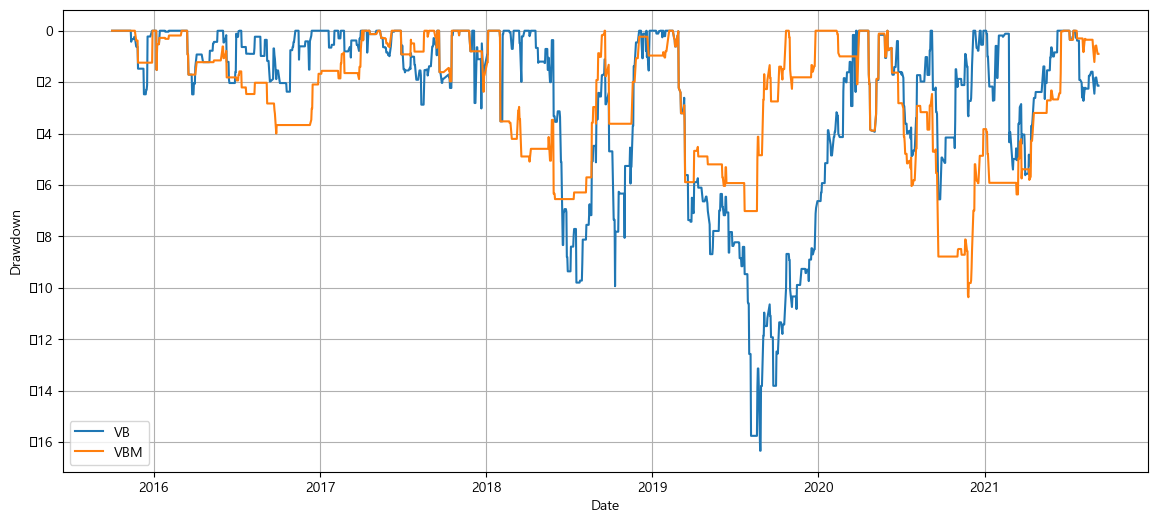

In [83]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(df.index, df['DD'] * -1, label='VB') # -1하면 그래프 위에서 아래로 떨어짐 1하면 정방향 (아래에서 위로올라가는 그래프)
ax.plot(df.index, df['DD2'] * -1, label='VBM')

#df.index (데이터프레임의 인덱스=날짜), DD = 낙폭

ax.grid()
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.legend(loc='best') # 범례를 최적의 위치에 
plt.show()

# 변동성 돌파 전략 =  마켓타이밍 적용한 변동성 돌파 전략보다 수익이 높고 위험성도 높다.

# 변동성 돌파 전략 + 마켓타이밍 = 변동성 돌파 전략만 적용한 것보다 수익률은 낮으나 안정성이 높다. 